# Exámen Posgrado Ciencia de Datos - Programación

In [218]:
import pandas as pd
import numpy as np

### 1.- Importar covid-data/200511COVID19MEXICO.csv

In [ ]:
covidOrig = pd.read_csv('covid-data/200511COVID19MEXICO.csv', delimiter=',', encoding='latin1') #

In [100]:
covidOrig

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-11,07f569,2,3,27,2,27,27,4,1,...,1,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-05-11,0b0e89,2,3,25,2,25,25,6,2,...,2,2,2,1,2,1,99,MÃ©xico,99,2
2,2020-05-11,0ecd46,2,3,27,1,27,27,4,1,...,2,2,2,2,2,1,99,MÃ©xico,99,97
3,2020-05-11,12eb62,2,3,25,1,25,25,6,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2
4,2020-05-11,032c9a,2,3,25,2,25,25,6,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135111,2020-05-11,07f104,1,12,9,1,15,9,5,2,...,2,2,2,2,2,3,99,MÃ©xico,99,2
135112,2020-05-11,164d88,1,12,4,1,4,4,2,2,...,2,2,2,2,2,3,99,MÃ©xico,99,2
135113,2020-05-11,0fdace,1,12,5,1,5,5,30,1,...,2,2,2,2,1,3,99,MÃ©xico,99,97
135114,2020-05-11,028993,1,12,31,1,30,31,102,1,...,2,2,2,2,2,3,99,MÃ©xico,99,97


In [220]:
covidOrig.dtypes #verificar tipo de datos de cada columna

FECHA_ACTUALIZACION    object
ID_REGISTRO            object
ORIGEN                  int64
SECTOR                  int64
ENTIDAD_UM              int64
SEXO                    int64
ENTIDAD_NAC             int64
ENTIDAD_RES             int64
MUNICIPIO_RES           int64
TIPO_PACIENTE           int64
FECHA_INGRESO          object
FECHA_SINTOMAS         object
FECHA_DEF              object
INTUBADO                int64
NEUMONIA                int64
EDAD                    int64
NACIONALIDAD            int64
EMBARAZO                int64
HABLA_LENGUA_INDIG      int64
DIABETES                int64
EPOC                    int64
ASMA                    int64
INMUSUPR                int64
HIPERTENSION            int64
OTRA_COM                int64
CARDIOVASCULAR          int64
OBESIDAD                int64
RENAL_CRONICA           int64
TABAQUISMO              int64
OTRO_CASO               int64
RESULTADO               int64
MIGRANTE                int64
PAIS_NACIONALIDAD      object
PAIS_ORIGE

### 2 Generar una tabla con 5 columnas:
* Fecha
* Confirmados de SARS-CoV2 en Sonora por fecha usando la fecha de inicio de síntomas (no acumulados)
* Decesos (entre los confirmados) por fecha.

In [226]:
covidOrig["DECESOS"] =  covidOrig["FECHA_DEF"] #generar una nueva columna de Decesos con los datos de fecha_def

In [227]:
covidOrig.loc[covidOrig['FECHA_DEF'] == '9999-99-99', 'DECESOS'] = np.nan #cambiar valores de fechas inexistentes a NaN

In [244]:
# generando tabla primero filtrando por estado 'Sonora = 26' según catalogo y por resultado 'positivo que es 1'
#seleccionando las columnas deseadas 'FECHA_ACTUALIZACION','FECHA_SINTOMAS', 'ENTIDAD_UM','RESULTADO','DECESOS'
#Agrupando por 'FECHA_SINTOMAS', 'ENTIDAD_UM', 'FECHA_ACTUALIZACION' 
#contabiliazadondo cantidad de casos positivos y decesos según la fecha
tabla1 = covidOrig.query('ENTIDAD_UM == 26 and RESULTADO == 1')[['FECHA_ACTUALIZACION','FECHA_SINTOMAS', 'ENTIDAD_UM','RESULTADO','DECESOS']].groupby(['FECHA_SINTOMAS', 'ENTIDAD_UM', 'FECHA_ACTUALIZACION']).count()

In [245]:
#cambiando nombre de columna RESULTADO por POSITIVOS
tabla1.rename(columns={'RESULTADO':'COVID19_POSITIVOS'}, inplace=True)

In [249]:
tabla1

,,,COVID19_POSITIVOS,DECESOS
FECHA_SINTOMAS,ENTIDAD_UM,FECHA_ACTUALIZACION,,
2020-03-11,26,2020-05-11,2,0
2020-03-12,26,2020-05-11,2,0
2020-03-16,26,2020-05-11,2,0
2020-03-17,26,2020-05-11,4,0
2020-03-18,26,2020-05-11,1,0
2020-03-19,26,2020-05-11,2,0
2020-03-20,26,2020-05-11,1,0
2020-03-22,26,2020-05-11,2,1
2020-03-23,26,2020-05-11,4,0


In [254]:
tabla1.to_csv('result_data/tabla1.csv', encoding='utf-8')

### Generar una tabla con la cantidad de casos hospitalizados en los estados de Sonora, Chihuahua, Nuevo León y Puebla.

In [262]:
#Diccionario de nombre de estados
estados = {8:'Chichuahua', 19:'Nuevo León', 21:'Puebla', 26:'Sonora'}

In [269]:
# creacion de tabla 2
#lo primero fue filtrar la entidad de unidad medica, con los codigos 8,19,21 y 26 que de acuerdo a catalogo son Chihahua, NL, Puebla y Sonora
# tambien se filtro por tipo_paciente = 2, segun catalogo fueron los pacientes hospitalizados
# seleccion de columnas entidad_um y tipo_paciente
# por ultimo agrupe por entidad he hice un conteo por cada persona hospitalizada del estado
tabla2 = covidOrig.query('ENTIDAD_UM == [8,19,21,26] and TIPO_PACIENTE == 2')[['ENTIDAD_UM', 'TIPO_PACIENTE']].groupby('ENTIDAD_UM').count()

In [270]:
tabla2["ESTADOS"] = tabla2.index # creacion de una nueva columna llamada estados

In [271]:
tabla2["ESTADOS"] = tabla2["ESTADOS"].map(estados) #map para comparar datos de tabla con diccionario estados y hacer el cambio

In [272]:
tabla2.set_index("ESTADOS", inplace=True) #colocar columna ESTADOS como nuevo index

In [278]:
tabla2.rename(columns={'TIPO_PACIENTE':'HOSPITALIZADOS'}, inplace=True) # cambiar nombre de columna TIPO_PACIENTE' por'HOSPITALIZADOS

In [279]:
tabla2 #mostrar tabla 2

,HOSPITALIZADOS
ESTADOS,
Chichuahua,1013
Nuevo León,1089
Puebla,1301
Sonora,549


In [281]:
# Guardar la tabla como tabla2.csv, realizar un commit en el repositorio de GitHub.
tabla2.to_csv('result_data/tabla2.csv', encoding='latin1')

### En grafica1 realizar una gráfica de barras verticales con el número de casos hospitalizados (de acuerdo a nuestro archivo) de los estados de Sonora, Chihuahua, Nuevo León y Puebla.

Text(0.5, 1.0, 'Casos de Hospitalizados en Chihuahua, Nuevo León, Puebla y Sonora')

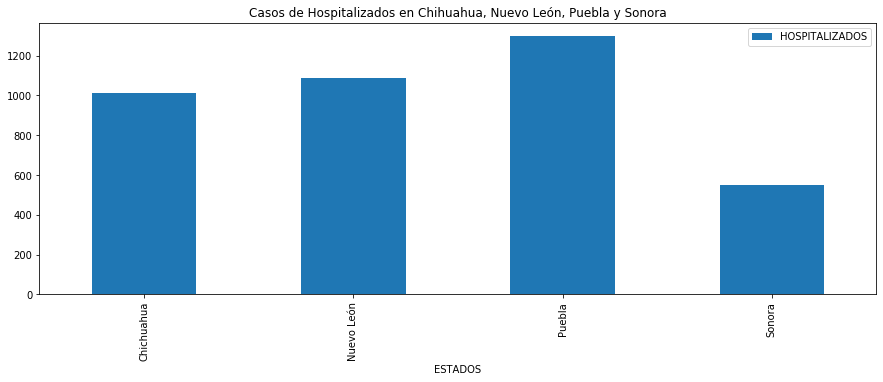

In [282]:
Grafica1 = tabla2.plot(kind="bar",figsize=(15,5)) # realizar con la informacion de tabla 2 un plot tipo barras con un tamaño de 15,5
Grafica1.set_title("Casos de Hospitalizados en Chihuahua, Nuevo León, Puebla y Sonora") #Poner un titulo

In [283]:
imagenPlot = Grafica1.get_figure() # obtener la forma (figura) del plot

In [ ]:
imagenPlot.savefig('result_data/grafico1.png')